# Classification models

Part of project 2017

In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


Working Directory

In [2]:
getwd()

[1] "/Users/shaivya"

In [3]:
setwd("/Users/shaivya/Desktop/networkdata_analysis")

In [4]:
wd = "/Users/shaivya/Desktop/networkdata_analysis"

Loading Data

In [8]:
# Load data 
data_network = read.csv(paste(wd, "/data_network.csv", sep = ""), stringsAsFactors = FALSE)

In [9]:
head(data_network)

CQI_STATUS,HOUR,RSRP,RSRQ,UE_POWER,GAP_TIME,TOT_TIME
Normal,0,35.85714,15.35714,18.5,0.07192859,35.26471
Normal,1,47.00000,16.00000,8.8,0.21760001,21.98700
Normal,2,36.80000,15.80000,13.6,1.16540003,17.22740
Normal,3,36.11111,14.55556,18.0,0.10077778,80.99433
Normal,4,32.00000,17.00000,16.0,0.06000018,11.48400
Normal,5,31.50000,17.00000,22.5,0.06950009,21.68300


Split and Train

In [11]:
set.seed(91234)

In [12]:
IDX <- createDataPartition(y = data_network$CQI_STATUS, p = 0.7, times = 1, list = F)

In [13]:
head(IDX)

Resample1
1
5
9
10
11
13


In [14]:
## Train set
TRAIN_X <- data_network[IDX, -1]
TRAIN_Y <- as.factor(data_network[IDX,  1])

TRAIN   <- cbind(CQI_STATUS = TRAIN_Y, TRAIN_X)

In [15]:
## Test set
TEST    <- data_network[-IDX,  ]
TEST$CQI_STATUS <- as.factor(TEST$CQI_STATUS)

In [16]:
## Distribution check
nrow(TRAIN) / (nrow(TRAIN) + nrow(TEST))

[1] 0.7030303

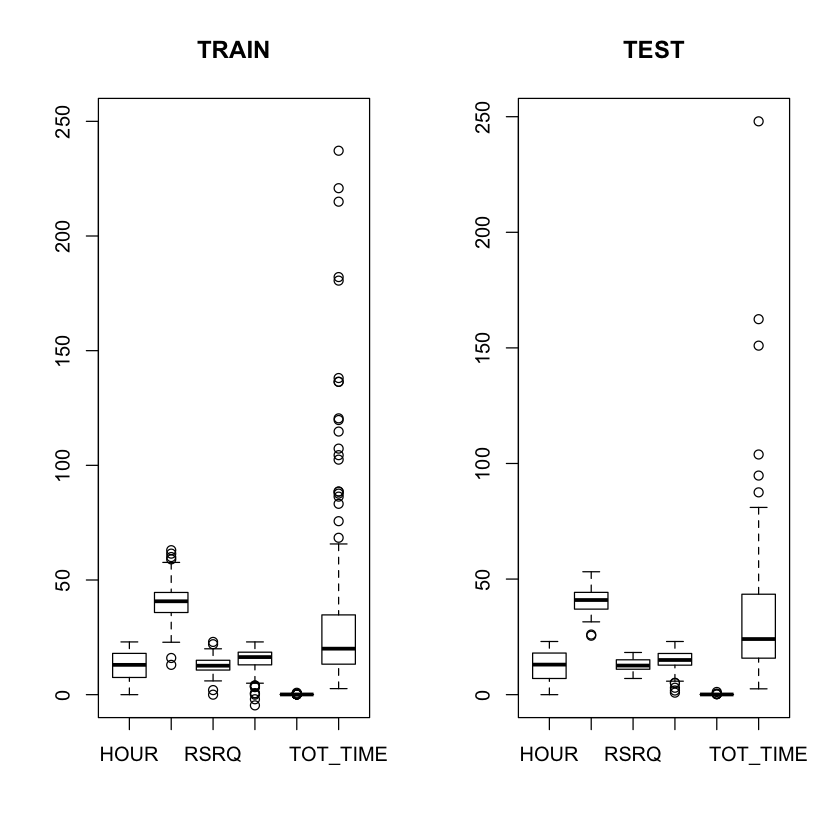

In [17]:
## Create a boxplot
par(mfrow=c(1,2))
boxplot(TRAIN[, -1], main = "TRAIN", ylim = c(0,250)) 
boxplot(TEST[,  -1], main = "TEST")

In [18]:
par(mfrow=c(1,1))

## Get summary
summary(TRAIN[, -1])

      HOUR            RSRP            RSRQ          UE_POWER     
 Min.   : 0.00   Min.   :13.00   Min.   : 0.00   Min.   :-13.00  
 1st Qu.: 7.75   1st Qu.:35.83   1st Qu.:10.77   1st Qu.: 13.00  
 Median :13.00   Median :40.72   Median :12.63   Median : 16.39  
 Mean   :12.20   Mean   :40.64   Mean   :12.78   Mean   : 15.02  
 3rd Qu.:18.00   3rd Qu.:44.53   3rd Qu.:15.00   3rd Qu.: 18.52  
 Max.   :23.00   Max.   :63.00   Max.   :23.00   Max.   : 23.00  
    GAP_TIME          TOT_TIME      
 Min.   :0.05100   Min.   :  2.634  
 1st Qu.:0.07830   1st Qu.: 13.327  
 Median :0.08862   Median : 20.061  
 Mean   :0.10087   Mean   : 36.454  
 3rd Qu.:0.10421   3rd Qu.: 34.541  
 Max.   :0.82400   Max.   :592.921  

In [19]:
summary(TEST[,  -1])

      HOUR            RSRP            RSRQ          UE_POWER     
 Min.   : 0.00   Min.   :25.50   Min.   : 7.00   Min.   : 0.875  
 1st Qu.: 7.00   1st Qu.:37.07   1st Qu.:11.00   1st Qu.:12.874  
 Median :13.00   Median :40.94   Median :12.59   Median :15.000  
 Mean   :12.35   Mean   :40.96   Mean   :12.92   Mean   :14.566  
 3rd Qu.:18.00   3rd Qu.:44.22   3rd Qu.:15.06   3rd Qu.:17.814  
 Max.   :23.00   Max.   :53.17   Max.   :18.25   Max.   :23.000  
    GAP_TIME          TOT_TIME      
 Min.   :0.05200   Min.   :  2.524  
 1st Qu.:0.07700   1st Qu.: 15.837  
 Median :0.09013   Median : 24.063  
 Mean   :0.11140   Mean   : 35.111  
 3rd Qu.:0.10423   3rd Qu.: 42.492  
 Max.   :1.16540   Max.   :247.997  

In [20]:
# del work variable
rm(data_network, IDX)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1981384,105.9,4007775,214.1,2503501,133.8
Vcells,3371180,25.8,8388608,64.0,5735354,43.8


In [22]:
### Train control

#Y = f(X)
#CQI_STATUS = f(HOUR, RSRP, RSRQ, UE_POWER, GAP_TIME, TOT_TIME)

In [23]:
train_ctrl_repeat  <- trainControl(method = "repeatedcv"
                                   , number = 10
                                   , repeats = 10
                                   , summaryFunction = twoClassSummary
                                   , classProbs = TRUE
                                   , preProcOptions = c("center","scale"))

train_ctrl_cv      <- trainControl(method = "cv"
                                    , number = 3
                                    , summaryFunction = twoClassSummary
                                    , classProbs = TRUE
                                    , preProcOptions = c("center","scale"))

train_ctrl_cv_resamp <- trainControl(method = "cv"
                                     , number = 3
                                     , returnResamp = "all"
                                     , preProcOptions = c("center","scale"))

# Tree

In [47]:
# Rpart
library(rpart)
library(e1071)

In [30]:
set.seed(72110)
M_rpart <- train(TRAIN_X, TRAIN_Y
                 , method = "rpart"
                 , trControl = train_ctrl_repeat
                 , metric = "ROC")


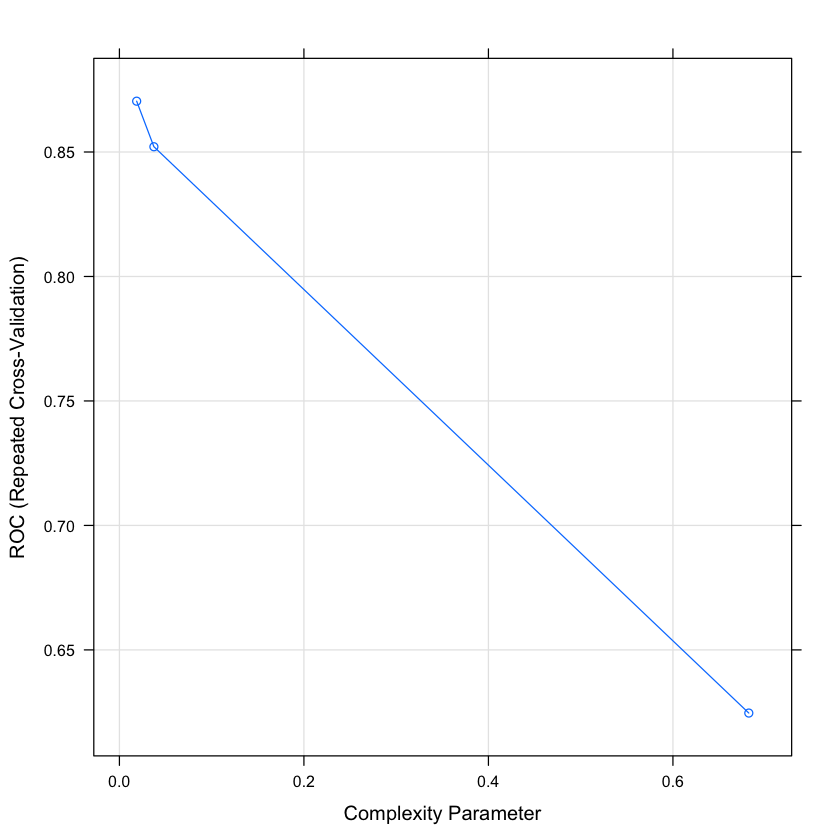

In [31]:
## Model
## CP. Complexity Parameter: tree size(prunning)
plot(M_rpart)

In [32]:
max(M_rpart$results$ROC)

[1] 0.8704146

In [34]:
## Final Model
#str(M_rpart)
M_rpart$finalModel

n= 232 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 232 107 Poor (0.46120690 0.53879310)  
  2) RSRQ>=14.225 81   4 Normal (0.95061728 0.04938272) *
  3) RSRQ< 14.225 151  30 Poor (0.19867550 0.80132450)  
    6) UE_POWER< 13.08763 22   9 Normal (0.59090909 0.40909091) *
    7) UE_POWER>=13.08763 129  17 Poor (0.13178295 0.86821705) *

In [35]:
M_rpart$finalModel$variable.importance

RSRQ UE_POWER     RSRP 
59.61732 21.17202 19.04236

In [48]:
M_rpart_pred <- predict(M_rpart, newdata = TEST)
confusionMatrix(M_rpart_pred, TEST$CQI_STATUS)

Confusion Matrix and Statistics

          Reference
Prediction Normal Poor
    Normal     38    8
    Poor        7   45
                                          
               Accuracy : 0.8469          
                 95% CI : (0.7601, 0.9117)
    No Information Rate : 0.5408          
    P-Value [Acc > NIR] : 1.365e-10       
                                          
                  Kappa : 0.6923          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8444          
            Specificity : 0.8491          
         Pos Pred Value : 0.8261          
         Neg Pred Value : 0.8654          
             Prevalence : 0.4592          
         Detection Rate : 0.3878          
   Detection Prevalence : 0.4694          
      Balanced Accuracy : 0.8468          
                                          
       'Positive' Class : Normal          
                  

# ctree

In [49]:
library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [51]:
set.seed(72111)
M_ctree <- train(TRAIN_X, TRAIN_Y
                 , method = "ctree"
                 , trControl = train_ctrl_repeat
                 , metric = "ROC")


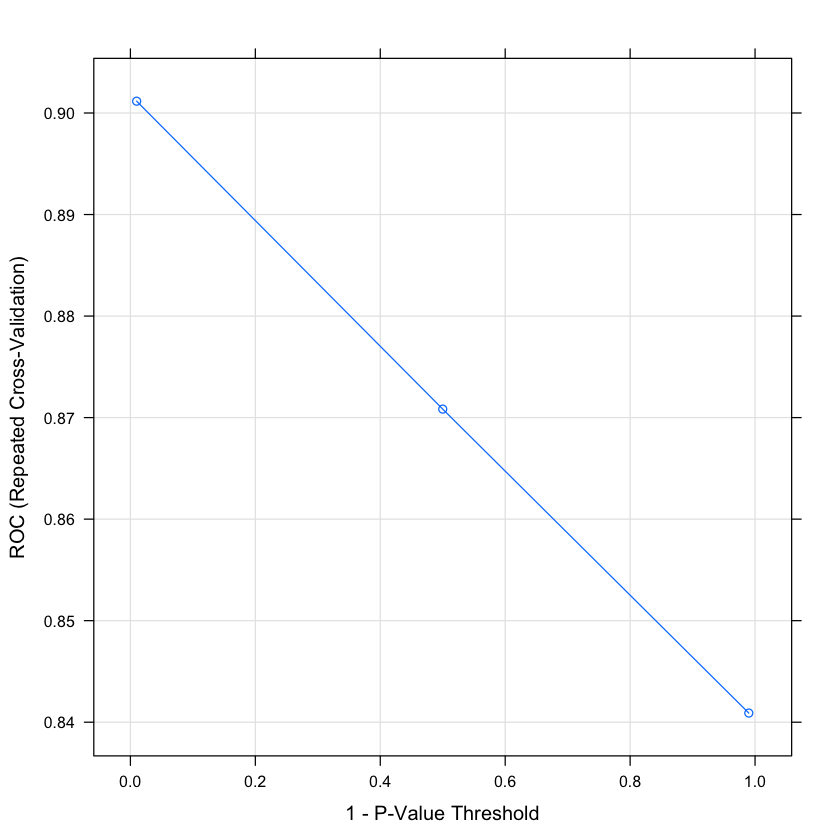

In [52]:
## Model
plot(M_ctree)

In [53]:
max(M_ctree$results$ROC)

[1] 0.9011643

In [54]:
## Final Model
M_ctree$finalModel


	 Conditional inference tree with 13 terminal nodes

Response:  .outcome 
Inputs:  HOUR, RSRP, RSRQ, UE_POWER, GAP_TIME, TOT_TIME 
Number of observations:  232 

1) RSRQ <= 14.2; criterion = 1, statistic = 78.056
  2) UE_POWER <= 13; criterion = 0.688, statistic = 3.529
    3) UE_POWER <= 11.5; criterion = 0.256, statistic = 1.618
      4)*  weights = 15 
    3) UE_POWER > 11.5
      5)*  weights = 7 
  2) UE_POWER > 13
    6) UE_POWER <= 19.8; criterion = 0.991, statistic = 10.051
      7) GAP_TIME <= 0.07075861; criterion = 0.344, statistic = 1.947
        8)*  weights = 7 
      7) GAP_TIME > 0.07075861
        9) RSRP <= 39.82353; criterion = 0.317, statistic = 1.846
          10)*  weights = 56 
        9) RSRP > 39.82353
          11) TOT_TIME <= 10.11348; criterion = 0.083, statistic = 0.91
            12)*  weights = 7 
          11) TOT_TIME > 10.11348
            13) RSRQ <= 12.5; criterion = 0.449, statistic = 2.355
              14)*  weights = 25 
            13) RSRQ > 1

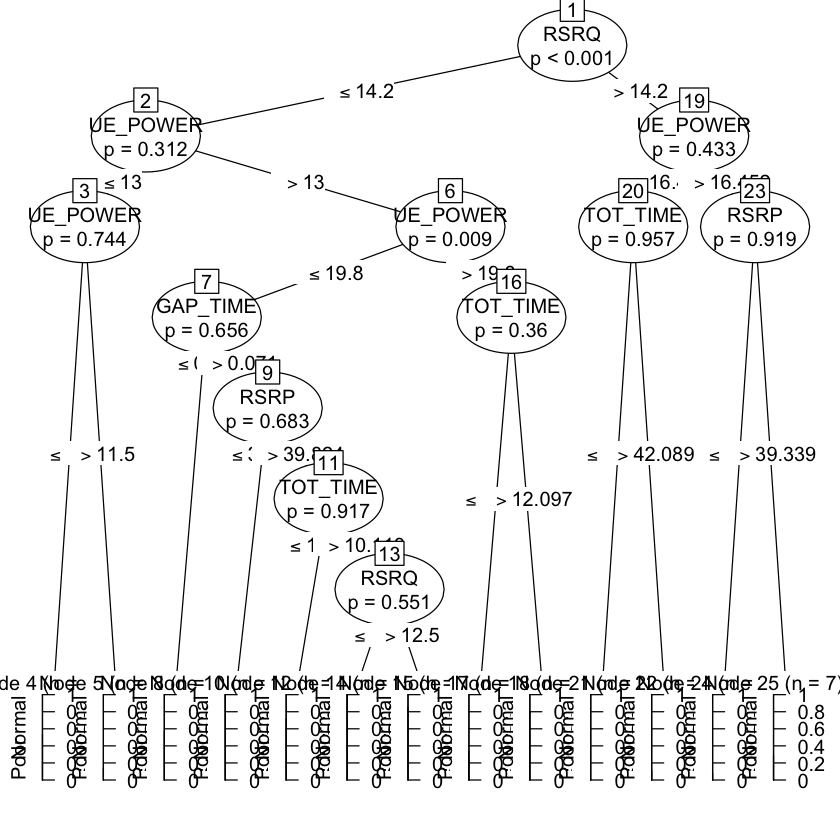

In [55]:
plot(M_ctree$finalModel)

In [56]:
M_ctree_pred <- predict(M_ctree, newdata = TEST)
confusionMatrix(M_ctree_pred, TEST$CQI_STATUS)

Confusion Matrix and Statistics

          Reference
Prediction Normal Poor
    Normal     35    4
    Poor       10   49
                                          
               Accuracy : 0.8571          
                 95% CI : (0.7719, 0.9196)
    No Information Rate : 0.5408          
    P-Value [Acc > NIR] : 2.814e-11       
                                          
                  Kappa : 0.7094          
                                          
 Mcnemar's Test P-Value : 0.1814          
                                          
            Sensitivity : 0.7778          
            Specificity : 0.9245          
         Pos Pred Value : 0.8974          
         Neg Pred Value : 0.8305          
             Prevalence : 0.4592          
         Detection Rate : 0.3571          
   Detection Prevalence : 0.3980          
      Balanced Accuracy : 0.8512          
                                          
       'Positive' Class : Normal          
                  

In [57]:
P_models <- resamples(list(rpart = M_rpart
                           , ctree = M_ctree))
summary(P_models)


Call:
summary.resamples(object = P_models)

Models: rpart, ctree 
Number of resamples: 100 

ROC 
           Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
rpart 0.6375000 0.8255682 0.8846154 0.8704146 0.9201923    1    0
ctree 0.7272727 0.8627622 0.9038462 0.9011643 0.9405594    1    0

Sens 
           Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
rpart 0.3636364 0.7272727 0.8181818 0.7964545 0.9022727    1    0
ctree 0.5454545 0.7272727 0.8181818 0.8315455 0.9090909    1    0

Spec 
      Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
rpart  0.5 0.7644231 0.8461538 0.8432692 0.9230769    1    0
ctree  0.5 0.7692308 0.8461538 0.8395513 0.9230769    1    0


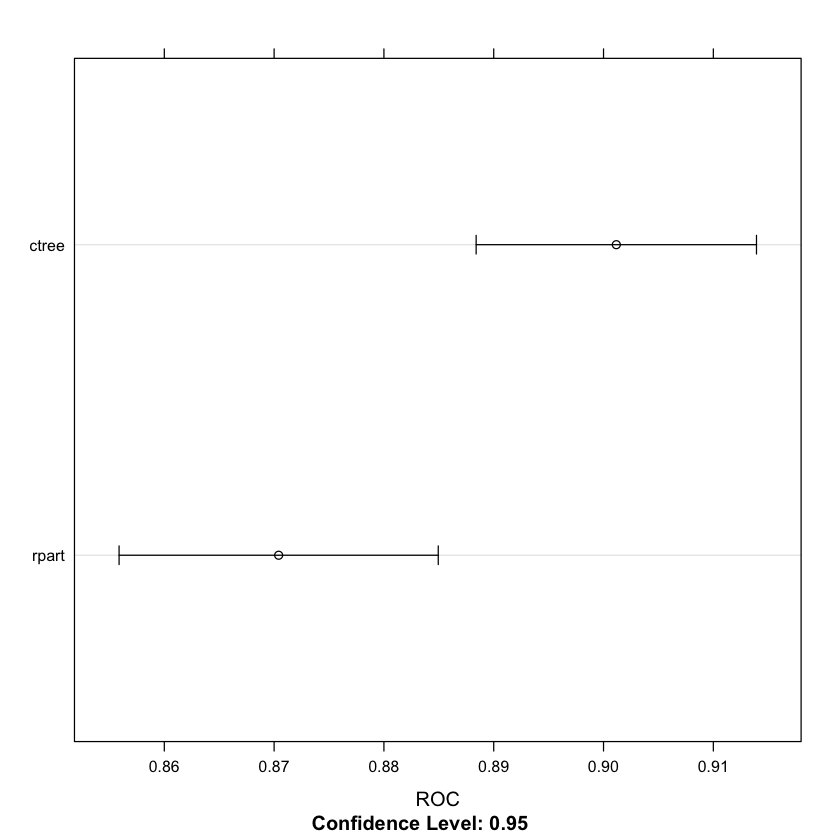

In [58]:
trellis.par.set(caretTheme())
dotplot(P_models, metric = "ROC")

# Random Forest

In [37]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [38]:
set.seed(72310)
M_rf <- train(TRAIN_X, TRAIN_Y
              , method = "rf"
              , importance = TRUE
              , trControl = train_ctrl_repeat
              , metric = "ROC")

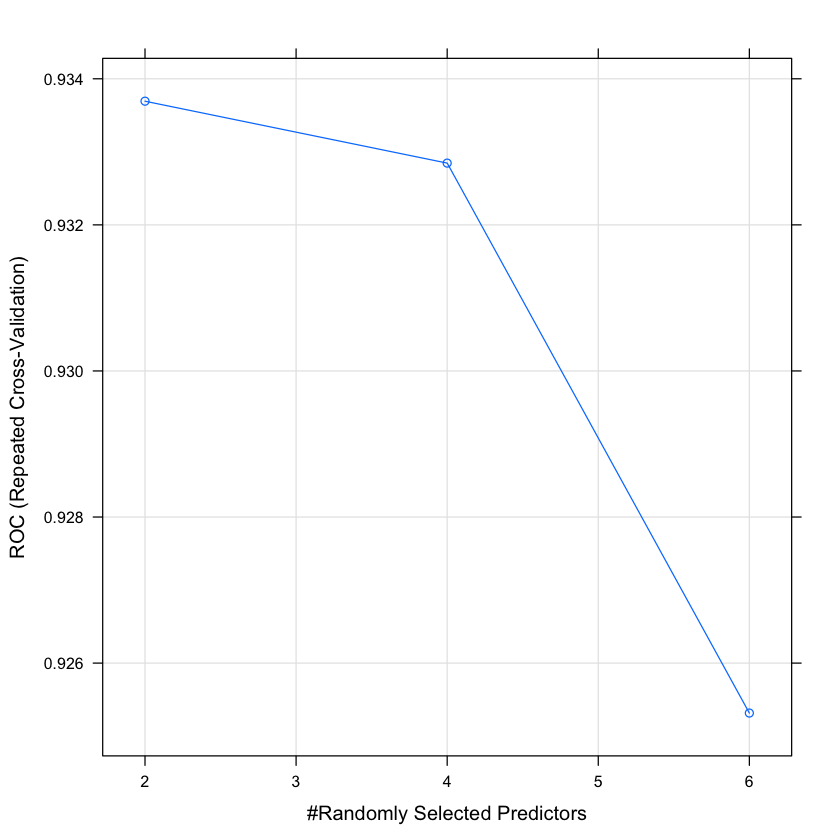

In [39]:
## Model
plot(M_rf)

In [40]:
max(M_rf$results$ROC)

[1] 0.9336935

In [41]:
## Final Model
M_rf$finalModel


Call:
 randomForest(x = x, y = y, mtry = param$mtry, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 15.95%
Confusion matrix:
       Normal Poor class.error
Normal     86   21   0.1962617
Poor       16  109   0.1280000

In [42]:
1 - mean(M_rf$finalModel$err.rate[,1])

[1] 0.8416522

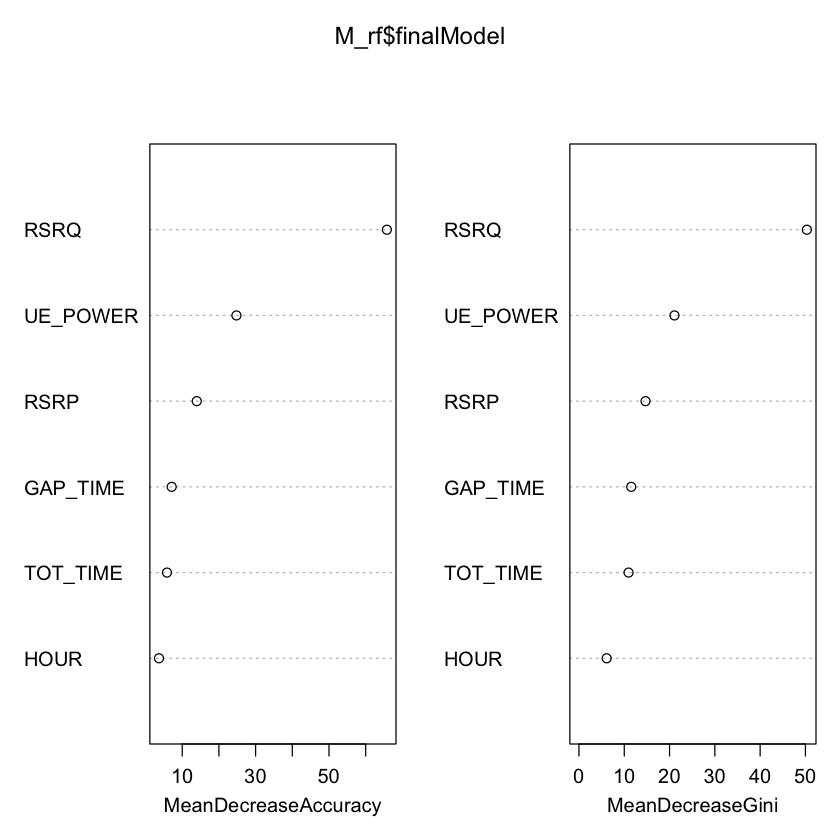

In [43]:
## Variable Importance
varImpPlot(M_rf$finalModel) 

In [59]:
M_rf_pred <- predict(M_rf, newdata = TEST)
confusionMatrix(M_rf_pred, TEST$CQI_STATUS)

Confusion Matrix and Statistics

          Reference
Prediction Normal Poor
    Normal     40    5
    Poor        5   48
                                        
               Accuracy : 0.898         
                 95% CI : (0.8203, 0.95)
    No Information Rate : 0.5408        
    P-Value [Acc > NIR] : 2.163e-14     
                                        
                  Kappa : 0.7945        
                                        
 Mcnemar's Test P-Value : 1             
                                        
            Sensitivity : 0.8889        
            Specificity : 0.9057        
         Pos Pred Value : 0.8889        
         Neg Pred Value : 0.9057        
             Prevalence : 0.4592        
         Detection Rate : 0.4082        
   Detection Prevalence : 0.4592        
      Balanced Accuracy : 0.8973        
                                        
       'Positive' Class : Normal        
                                        

# SVM

SVM Radial

In [61]:
library(kernlab)


Attaching package: ‘kernlab’

The following object is masked from ‘package:modeltools’:

    prior

The following object is masked from ‘package:ggplot2’:

    alpha



In [62]:
set.seed(72401)
M_svm_radial <- train(TRAIN_X, TRAIN_Y
                       , method = "svmRadial"
                       , trControl = train_ctrl_repeat
                       , metric = "ROC")

In [63]:
## Model
M_svm_radial

Support Vector Machines with Radial Basis Function Kernel 

232 samples
  6 predictor
  2 classes: 'Normal', 'Poor' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 208, 209, 210, 208, 209, 209, ... 
Resampling results across tuning parameters:

  C     ROC        Sens       Spec     
  0.25  0.8969161  0.8040000  0.8547436
  0.50  0.8994872  0.8045455  0.8523077
  1.00  0.8974481  0.7990909  0.8471154

Tuning parameter 'sigma' was held constant at a value of 0.3074733
ROC was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.3074733 and C = 0.5.

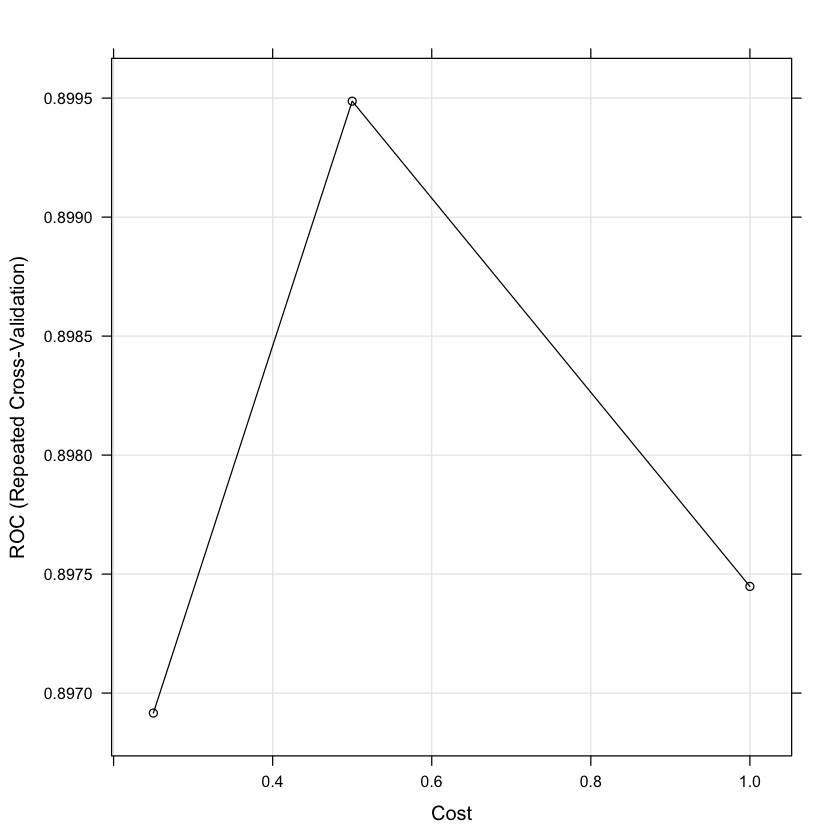

In [64]:
plot(M_svm_radial)

In [65]:
max(M_svm_radial$results$ROC)

[1] 0.8994872

In [66]:
## Final Model
M_svm_radial$finalModel

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 0.5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.307473346783778 

Number of Support Vectors : 136 

Objective Function Value : -48.153 
Training error : 0.116379 
Probability model included. 

In [67]:
1- M_svm_radial$finalModel@error

[1] 0.8836207

In [68]:
M_svm_radial_pred <- predict(M_svm_radial, newdata = TEST[,-1])
confusionMatrix(M_svm_radial_pred, TEST$CQI_STATUS)

Confusion Matrix and Statistics

          Reference
Prediction Normal Poor
    Normal     39    7
    Poor        6   46
                                          
               Accuracy : 0.8673          
                 95% CI : (0.7838, 0.9274)
    No Information Rate : 0.5408          
    P-Value [Acc > NIR] : 5.355e-12       
                                          
                  Kappa : 0.7334          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8667          
            Specificity : 0.8679          
         Pos Pred Value : 0.8478          
         Neg Pred Value : 0.8846          
             Prevalence : 0.4592          
         Detection Rate : 0.3980          
   Detection Prevalence : 0.4694          
      Balanced Accuracy : 0.8673          
                                          
       'Positive' Class : Normal          
                  

SVM Poly

In [69]:
set.seed(72402)
M_svm_poly <- train(TRAIN_X, TRAIN_Y
                    , method = "svmPoly"
                    , trControl = train_ctrl_repeat
                    , metric = "ROC")

In [70]:
## Model
M_svm_poly

Support Vector Machines with Polynomial Kernel 

232 samples
  6 predictor
  2 classes: 'Normal', 'Poor' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 209, 209, 209, 208, 208, 210, ... 
Resampling results across tuning parameters:

  degree  scale  C     ROC        Sens       Spec     
  1       0.001  0.25  0.8678036  0.8538182  0.6535256
  1       0.001  0.50  0.8676509  0.8567273  0.6543590
  1       0.001  1.00  0.8677267  0.8565455  0.6543590
  1       0.010  0.25  0.8693042  0.8510000  0.6986538
  1       0.010  0.50  0.8786725  0.8259091  0.8168590
  1       0.010  1.00  0.8865583  0.8104545  0.8478846
  1       0.100  0.25  0.8847978  0.7774545  0.8702564
  1       0.100  0.50  0.8857249  0.7831818  0.8662821
  1       0.100  1.00  0.8863409  0.7860909  0.8791667
  2       0.001  0.25  0.8678036  0.8547273  0.6527564
  2       0.001  0.50  0.8678036  0.8548182  0.6567949
  2       0.001  1.00  0.8679586  0.8529091  0.6585

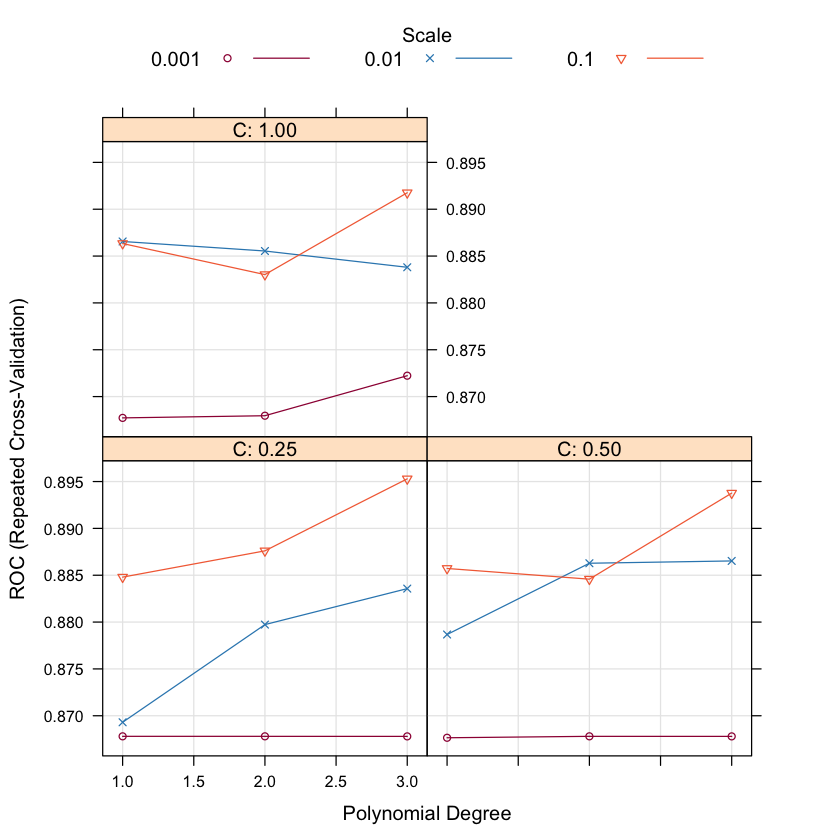

In [75]:
plot(M_svm_poly)

In [72]:
max(M_svm_poly$results$ROC)

[1] 0.895289

In [73]:
1- M_svm_poly$finalModel@error

[1] 0.8793103

In [74]:
M_svm_poly_pred <- predict(M_svm_poly, newdata = TEST[,-1])
confusionMatrix(M_svm_poly_pred, TEST$CQI_STATUS)

Confusion Matrix and Statistics

          Reference
Prediction Normal Poor
    Normal     39    6
    Poor        6   47
                                          
               Accuracy : 0.8776          
                 95% CI : (0.7959, 0.9351)
    No Information Rate : 0.5408          
    P-Value [Acc > NIR] : 9.362e-13       
                                          
                  Kappa : 0.7535          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8667          
            Specificity : 0.8868          
         Pos Pred Value : 0.8667          
         Neg Pred Value : 0.8868          
             Prevalence : 0.4592          
         Detection Rate : 0.3980          
   Detection Prevalence : 0.4592          
      Balanced Accuracy : 0.8767          
                                          
       'Positive' Class : Normal          
                  

SVM Linear

In [76]:
set.seed(72403)
M_svm_linear <- train(TRAIN_X, TRAIN_Y
                      , method = "svmLinear"
                      , trControl = train_ctrl_repeat
                      , metric = "ROC")


In [77]:
## Model
M_svm_linear

Support Vector Machines with Linear Kernel 

232 samples
  6 predictor
  2 classes: 'Normal', 'Poor' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 210, 209, 209, 208, 208, 209, ... 
Resampling results:

  ROC        Sens       Spec     
  0.8784476  0.7820909  0.8785256

Tuning parameter 'C' was held constant at a value of 1

In [78]:
max(M_svm_linear$results$ROC)

[1] 0.8784476

In [79]:
## Final Model
M_svm_linear$finalModel

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 105 

Objective Function Value : -99.6963 
Training error : 0.155172 
Probability model included. 

In [80]:
1- M_svm_linear$finalModel@error

[1] 0.8448276

In [81]:
M_svm_linear_pred <- predict(M_svm_linear, newdata = TEST[,-1])
confusionMatrix(M_svm_linear_pred, TEST$CQI_STATUS)

Confusion Matrix and Statistics

          Reference
Prediction Normal Poor
    Normal     41    6
    Poor        4   47
                                        
               Accuracy : 0.898         
                 95% CI : (0.8203, 0.95)
    No Information Rate : 0.5408        
    P-Value [Acc > NIR] : 2.163e-14     
                                        
                  Kappa : 0.7952        
                                        
 Mcnemar's Test P-Value : 0.7518        
                                        
            Sensitivity : 0.9111        
            Specificity : 0.8868        
         Pos Pred Value : 0.8723        
         Neg Pred Value : 0.9216        
             Prevalence : 0.4592        
         Detection Rate : 0.4184        
   Detection Prevalence : 0.4796        
      Balanced Accuracy : 0.8990        
                                        
       'Positive' Class : Normal        
                                        

SVM Linear2

In [82]:
set.seed(72403)
M_svm_linear2 <- train(TRAIN_X, TRAIN_Y
                       , method = "svmLinear2"
                       , trControl = train_ctrl_repeat
                       , metric = "ROC")


In [83]:
## Model
M_svm_linear2

Support Vector Machines with Linear Kernel 

232 samples
  6 predictor
  2 classes: 'Normal', 'Poor' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 210, 209, 209, 208, 208, 209, ... 
Resampling results across tuning parameters:

  cost  ROC        Sens       Spec     
  0.25  0.8805390  0.7782727  0.8824359
  0.50  0.8795594  0.7763636  0.8822436
  1.00  0.8782885  0.7754545  0.8832051

ROC was used to select the optimal model using the largest value.
The final value used for the model was cost = 0.25.

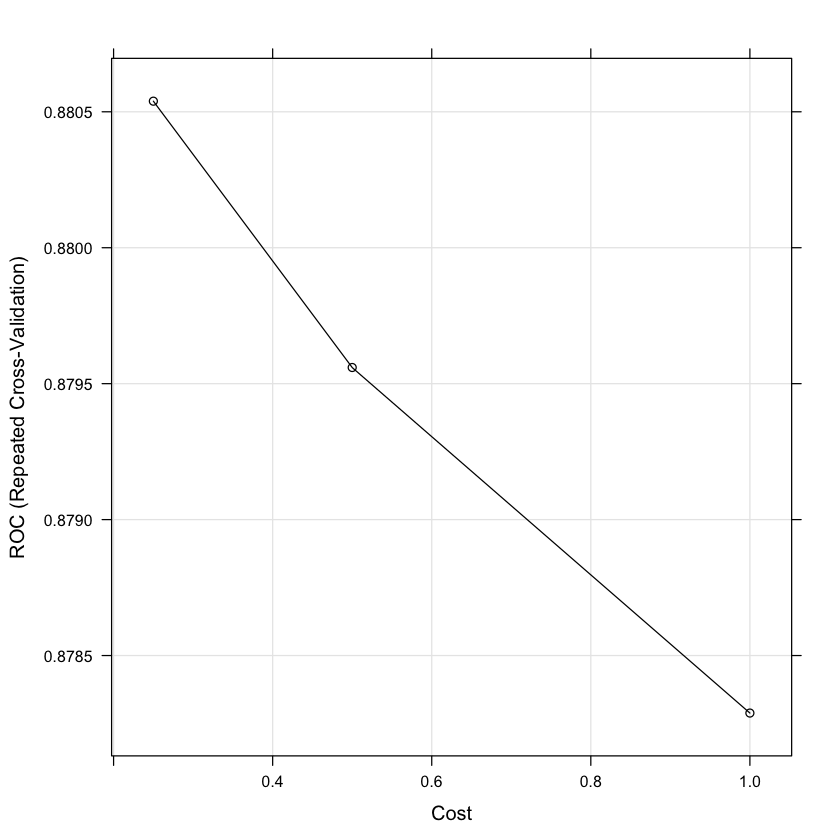

In [84]:
plot(M_svm_linear2)

In [85]:
max(M_svm_linear2$results$ROC)

[1] 0.880539

In [86]:
## Final Model
M_svm_linear2$finalModel


Call:
svm.default(x = as.matrix(x), y = y, kernel = "linear", cost = param$cost, 
    probability = classProbs)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.25 
      gamma:  0.1666667 

Number of Support Vectors:  111


In [87]:
confusionMatrix(M_svm_linear2$finalModel$fitted, TRAIN$CQI_STATUS)

Confusion Matrix and Statistics

          Reference
Prediction Normal Poor
    Normal     84   13
    Poor       23  112
                                          
               Accuracy : 0.8448          
                 95% CI : (0.7917, 0.8889)
    No Information Rate : 0.5388          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6857          
                                          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 0.7850          
            Specificity : 0.8960          
         Pos Pred Value : 0.8660          
         Neg Pred Value : 0.8296          
             Prevalence : 0.4612          
         Detection Rate : 0.3621          
   Detection Prevalence : 0.4181          
      Balanced Accuracy : 0.8405          
                                          
       'Positive' Class : Normal          
                  

In [88]:
M_svm_linear2_pred <- predict(M_svm_linear2, newdata = TEST[,-1])
confusionMatrix(M_svm_linear2_pred, TEST$CQI_STATUS)

Confusion Matrix and Statistics

          Reference
Prediction Normal Poor
    Normal     41    5
    Poor        4   48
                                          
               Accuracy : 0.9082          
                 95% CI : (0.8328, 0.9571)
    No Information Rate : 0.5408          
    P-Value [Acc > NIR] : 2.817e-15       
                                          
                  Kappa : 0.8154          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9111          
            Specificity : 0.9057          
         Pos Pred Value : 0.8913          
         Neg Pred Value : 0.9231          
             Prevalence : 0.4592          
         Detection Rate : 0.4184          
   Detection Prevalence : 0.4694          
      Balanced Accuracy : 0.9084          
                                          
       'Positive' Class : Normal          
                  

# Performance tree,Random Forest and SVM

In [89]:
P_models <- resamples(list(rpart          = M_rpart
                           , ctree        = M_ctree
                           , randomForest = M_rf
                           , svm_radial   = M_svm_radial
                           , svm_poly     = M_svm_poly
                           , svm_linear   = M_svm_linear
                           , svm_linear2  = M_svm_linear2))

In [90]:
summary(P_models)


Call:
summary.resamples(object = P_models)

Models: rpart, ctree, randomForest, svm_radial, svm_poly, svm_linear, svm_linear2 
Number of resamples: 100 

ROC 
                  Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
rpart        0.6375000 0.8255682 0.8846154 0.8704146 0.9201923    1    0
ctree        0.7272727 0.8627622 0.9038462 0.9011643 0.9405594    1    0
randomForest 0.8143939 0.9087413 0.9428613 0.9336935 0.9666667    1    0
svm_radial   0.7482517 0.8531469 0.9048951 0.8994872 0.9405594    1    0
svm_poly     0.7196970 0.8531469 0.9083916 0.8952890 0.9540210    1    0
svm_linear   0.6333333 0.8251311 0.8975524 0.8784476 0.9479895    1    0
svm_linear2  0.6333333 0.8305653 0.8958333 0.8805390 0.9463578    1    0

Sens 
                  Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
rpart        0.3636364 0.7272727 0.8181818 0.7964545 0.9022727    1    0
ctree        0.5454545 0.7272727 0.8181818 0.8315455 0.9090909    1    0
randomForest 0.4545455 0.72727

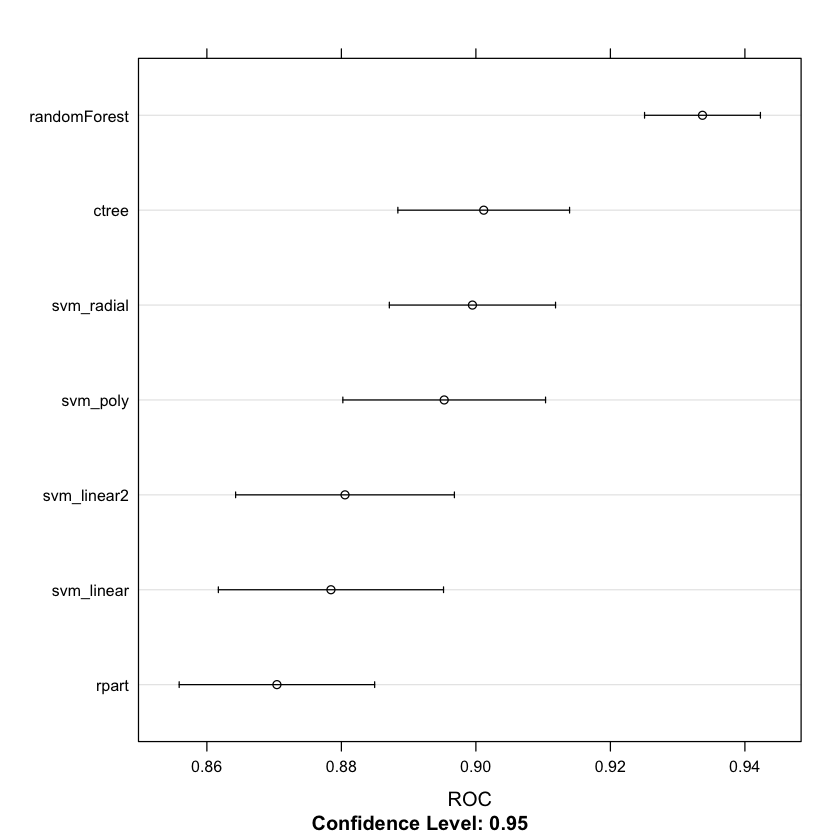

In [91]:
trellis.par.set(caretTheme())
dotplot(P_models, metric = "ROC")